In [1]:
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable)
import socket
print(socket.gethostname())
import os
os.chdir("/home/icb/alioguz.can/projects/campa_pt")

/home/icb/alioguz.can/miniconda3/envs/campa_pt/bin/python
gpusrv29.scidom.de


In [2]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ""
# TF_ENABLE_ONEDNN_OPTS=0

In [3]:
from campa.tl import (
    Cluster,
    # Estimator,
    TorchEstimator,
    # Predictor,
    TorchPredictor,
    # Experiment,
    TorchExperiment,
    ModelComparator,
    # run_experiments,
    run_torch_experiments
)

/home/icb/alioguz.can/miniconda3/envs/campa_pt/lib/python3.9/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [4]:
from campa.data import MPPData
from campa.utils import init_logging
from campa.constants import campa_config

In [5]:
from pathlib import Path
# init logging with level INFO=20, WARNING=30
init_logging(level=30)
# read correct campa_config -- created with setup.ipynb
CAMPA_DIR = Path.cwd()
campa_config.config_fname = CAMPA_DIR / "notebooks/params/campa.ini"
print(campa_config)

Reading config from /ictstr01/home/icb/alioguz.can/projects/campa_pt/notebooks/params/campa.ini
CAMPAConfig (fname: /ictstr01/home/icb/alioguz.can/projects/campa_pt/notebooks/params/campa.ini)
EXPERIMENT_DIR: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments
BASE_DATA_DIR: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_data
CO_OCC_CHUNK_SIZE: 10000000.0
data_config/exampledata: /home/icb/alioguz.can/projects/campa_pt/notebooks/params/ExampleData_constants.py



In [61]:
# import tensorflow as tf
# from tensorflow.keras import backend as K
# import torch
# torch.cuda.empty_cache()
# # Clear the current session
# K.clear_session()

# # Optionally, reset the default graph
# tf.compat.v1.reset_default_graph()

TF

In [62]:
# # get Experiments from config
# exps = Experiment.get_experiments_from_config("notebooks/params/example_experiment_params.py")
# run_experiments(exps, mode="trainval")

In [63]:
# exp = exps[1]
# print("Experiment name:", exp.name)
# print("Experiment is stored in:", exp.full_path)

In [64]:
# print(Estimator(exps[0]).model.summary)

In [65]:
# est = Estimator(exps[1])
# _ = est.train_model()
# pred_torch = Predictor(exps[1])
# pred_torch.evaluate_model()
# cl = Cluster.from_exp_split(exps[1])
# cl.create_clustering()

Torch

In [66]:
torch_exps = TorchExperiment.get_experiments_from_config("notebooks/params/example_experiment_params_torch.py")
print("Experiment name:", torch_exps[0].name)
print("Experiment is stored in:", torch_exps[0].full_path)

Experiment name: VAE
Experiment is stored in: /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE


In [67]:
# est_torch = TorchEstimator(torch_exps[1])
# print(est_torch.model)
# est_torch.model.total_trainable_params()

In [68]:
# est_torch.train_model()
# pred_torch = TorchPredictor(torch_exps[1])
# pred_torch.evaluate_model()
# results_folder = os.path.join(pred_torch.exp.full_path, f"results_epoch{pred_torch.est.epoch:03d}")
# print("Results folder", results_folder)
# print(os.listdir(results_folder))

In [69]:
# cl = Cluster.from_exp_split(torch_exps[0])
# print(cl.config["leiden_resolution"])
# cl.create_clustering()

In [70]:
torch_exps = TorchExperiment.get_experiments_from_config("notebooks/params/example_experiment_params_torch.py")

In [71]:
run_torch_experiments(torch_exps, mode="trainval")

Running experiment for ['VAE', 'CondVAE_pert-CC', 'MPPleiden'] with mode trainval
Training model for VAE
Device: cuda


Epochs:   2%|▏         | 2/100 [00:48<39:32, 24.21s/it]


KeyboardInterrupt: 

In [6]:
# get saved experiments from dir
exps = TorchExperiment.get_experiments_from_dir("torch_test")
comp = ModelComparator(exps)

Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val_imgs/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/VAE/results_epoch000/val_imgs/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/MPPleiden/results_epoch000/val/clustering.npy
Cannot read with memmap:  /home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/MPPleiden/results_epoch000/val_imgs/clustering.npy


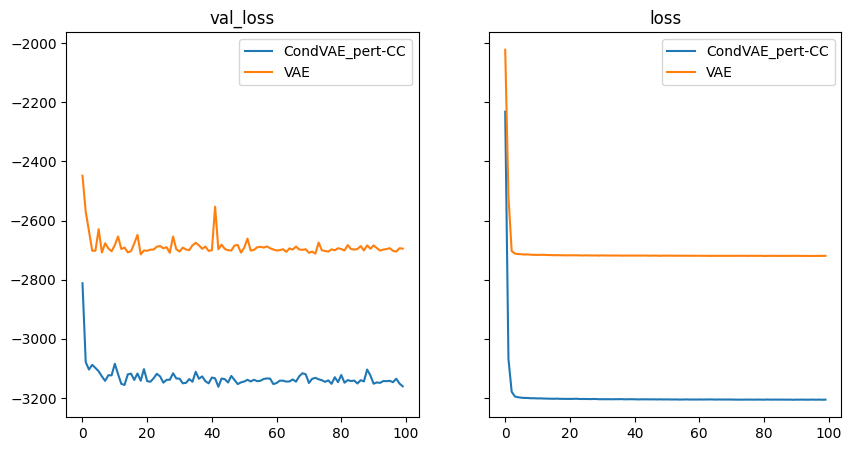

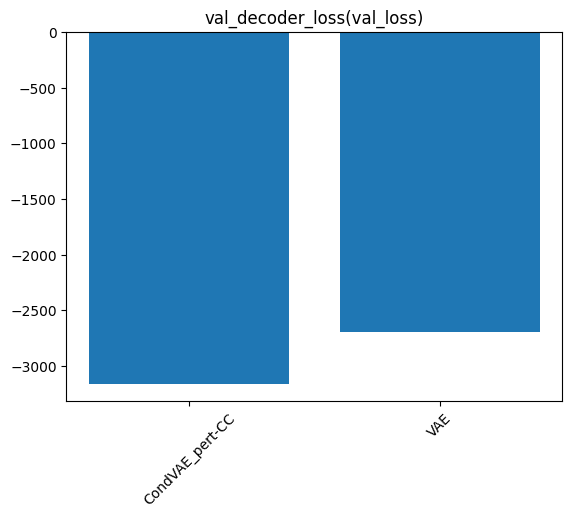

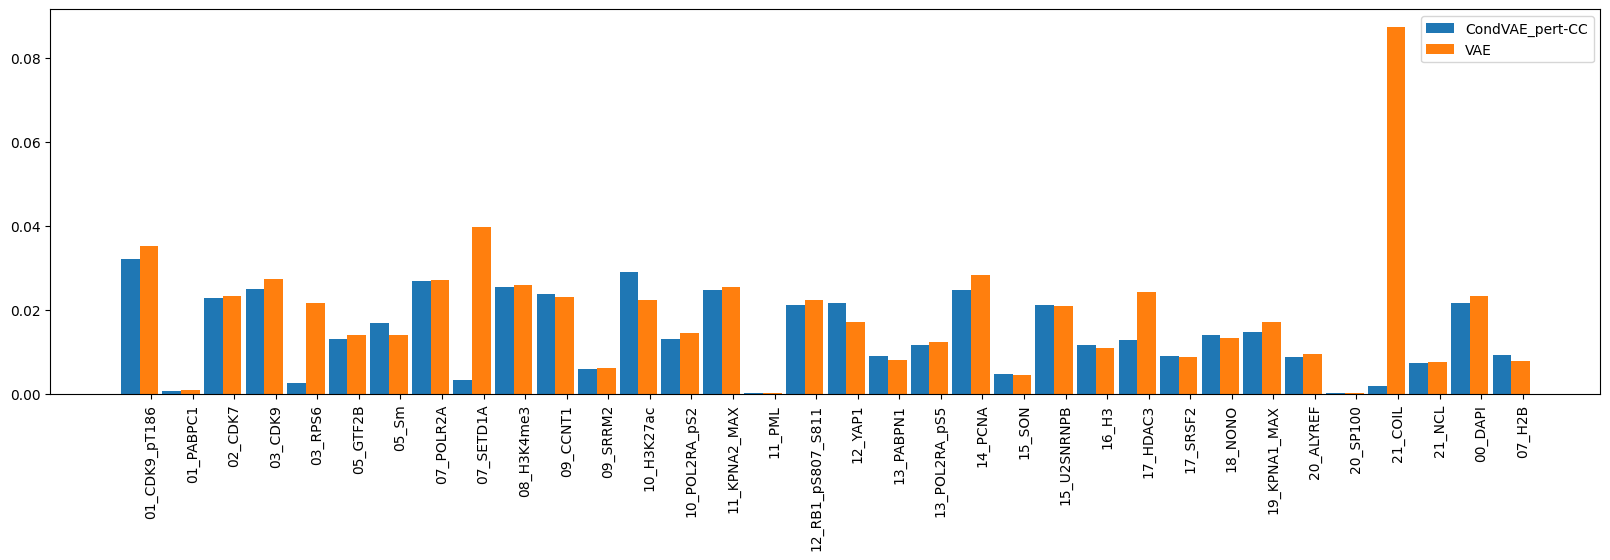

In [7]:
comp.plot_history(values=["val_loss", "loss"])
comp.plot_final_score(score="val_decoder_loss", fallback_score="val_loss", save_prefix="decoder_loss_")
comp.plot_per_channel_mse()

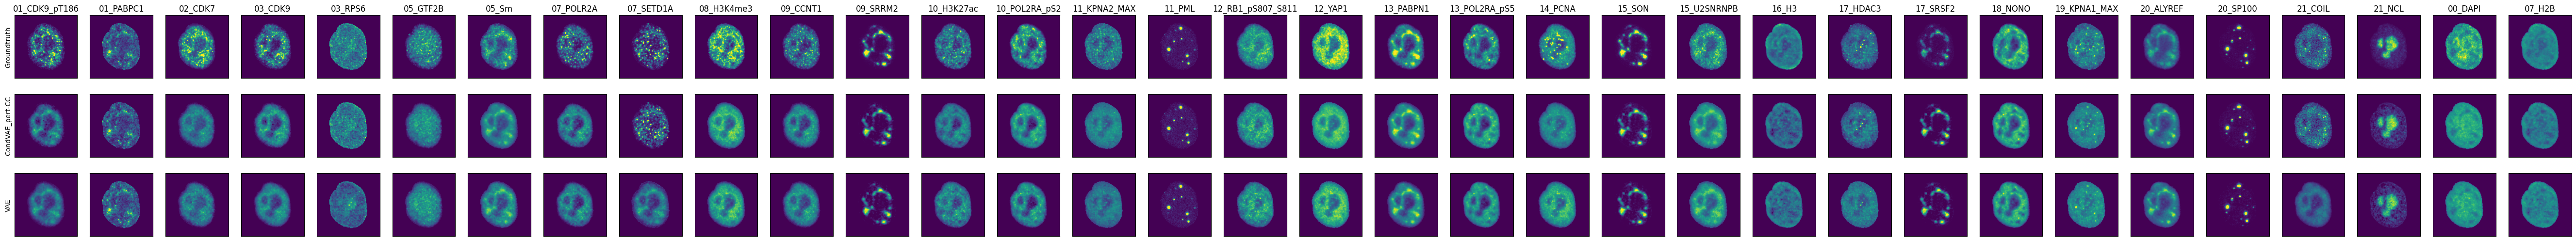

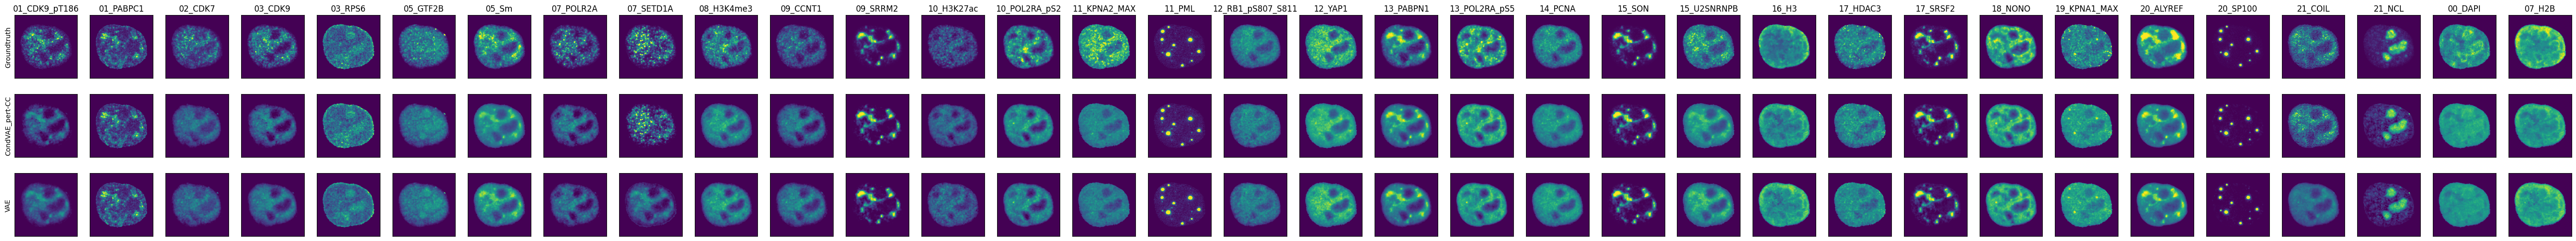

In [8]:
comp.plot_predicted_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
)

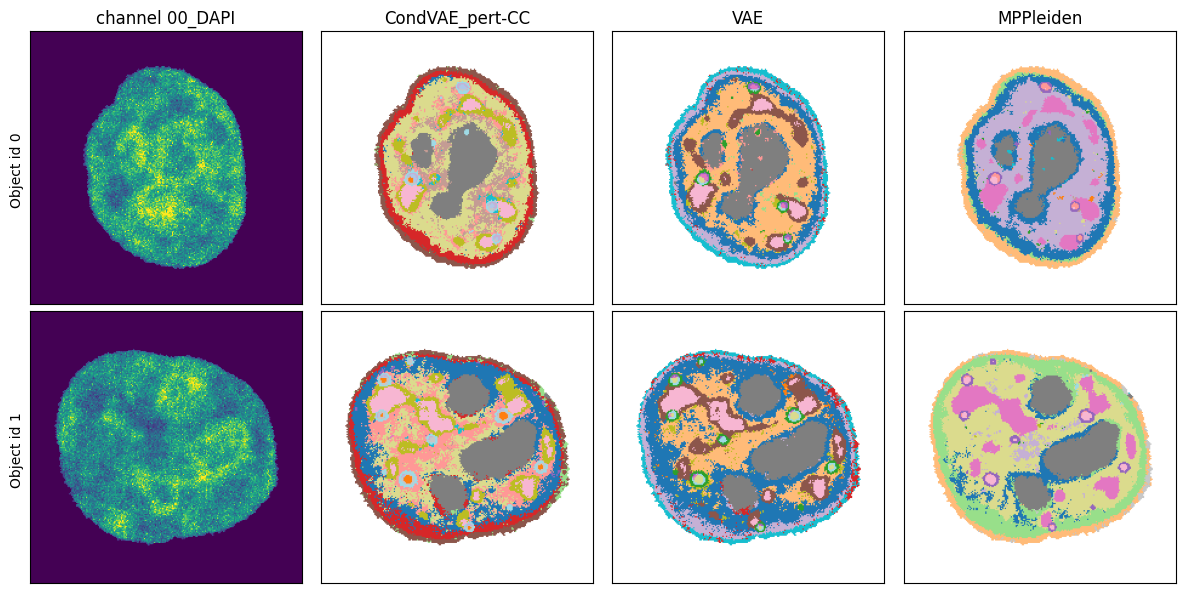

In [9]:
comp.plot_cluster_images(
    img_ids=[
        0,
        1,
    ],
    img_size=225,
    img_channel="00_DAPI",
)

In [21]:
mpp_data = MPPData.from_data_dir("/home/icb/alioguz.can/projects/campa_pt/notebooks/example_experiments/torch_test/CondVAE_pert-CC/results_epoch000/val_imgs", data_config="ExampleData", optional_keys=["decoder", "latent"])
print(mpp_data)
print("latent: ",mpp_data.data("latent").shape)
print("decoder: ",mpp_data.data("decoder").shape)